In [1]:
import torch
import ugs_sampler
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
n = 10; k = 6

G_edge_index = torch.tensor([[0,1,2,3,4,5,5,6,7,8,9],
                           [1,2,3,4,5,0,6,7,8,9,0]], dtype=torch.long)
G_node_color = {
    0:"yellow",1:"blue",2:"red",3:"red",4:"blue",5:"yellow",6:"blue",7:"red",8:"red",9:"blue"
}

H_edge_index = torch.tensor([[0,1,2,3,4,5,0,6,7,8,9],
                            [1,2,3,4,5,1,6,7,8,9,0]], dtype=torch.long)
H_node_color = {
    0:"yellow",1:"yellow",2:"blue",3:"red",4:"red",5:"blue",6:"blue",7:"red",8:"red",9:"blue"
}

In [3]:
def draw_subgraphs(edge_index,node_color,n,k):
    handle = ugs_sampler.create_preproc(edge_index, n, k)
    nodes, edge_index_s, edge_ptr, graph_id = ugs_sampler.sample(handle, m_per_graph=40, k=k)
    B = nodes.size(0)
    fig, axes = plt.subplots(8,5,figsize=(20,20))
    axes = axes.flatten()
    for b in range(B):
        global_nodes = nodes[b].tolist()
        valid = [i for i,v in enumerate(global_nodes) if v>=0]
        mapping = {i: global_nodes[i] for i in valid}

        start, end = edge_ptr[b].item(), edge_ptr[b+1].item()
        local_edges = edge_index_s[:,start:end].T.tolist()

        G = nx.Graph()
        G.add_nodes_from(mapping.values())
        for u,v in local_edges:
            G.add_edge(mapping[u], mapping[v])
        
        node_color_s = [node_color[i] for i in mapping.values()]
        nx.draw(G,with_labels=True, ax=axes[b], node_color=node_color_s)
        axes[b].set_title(f"Sample:{b}")
   
    plt.show()

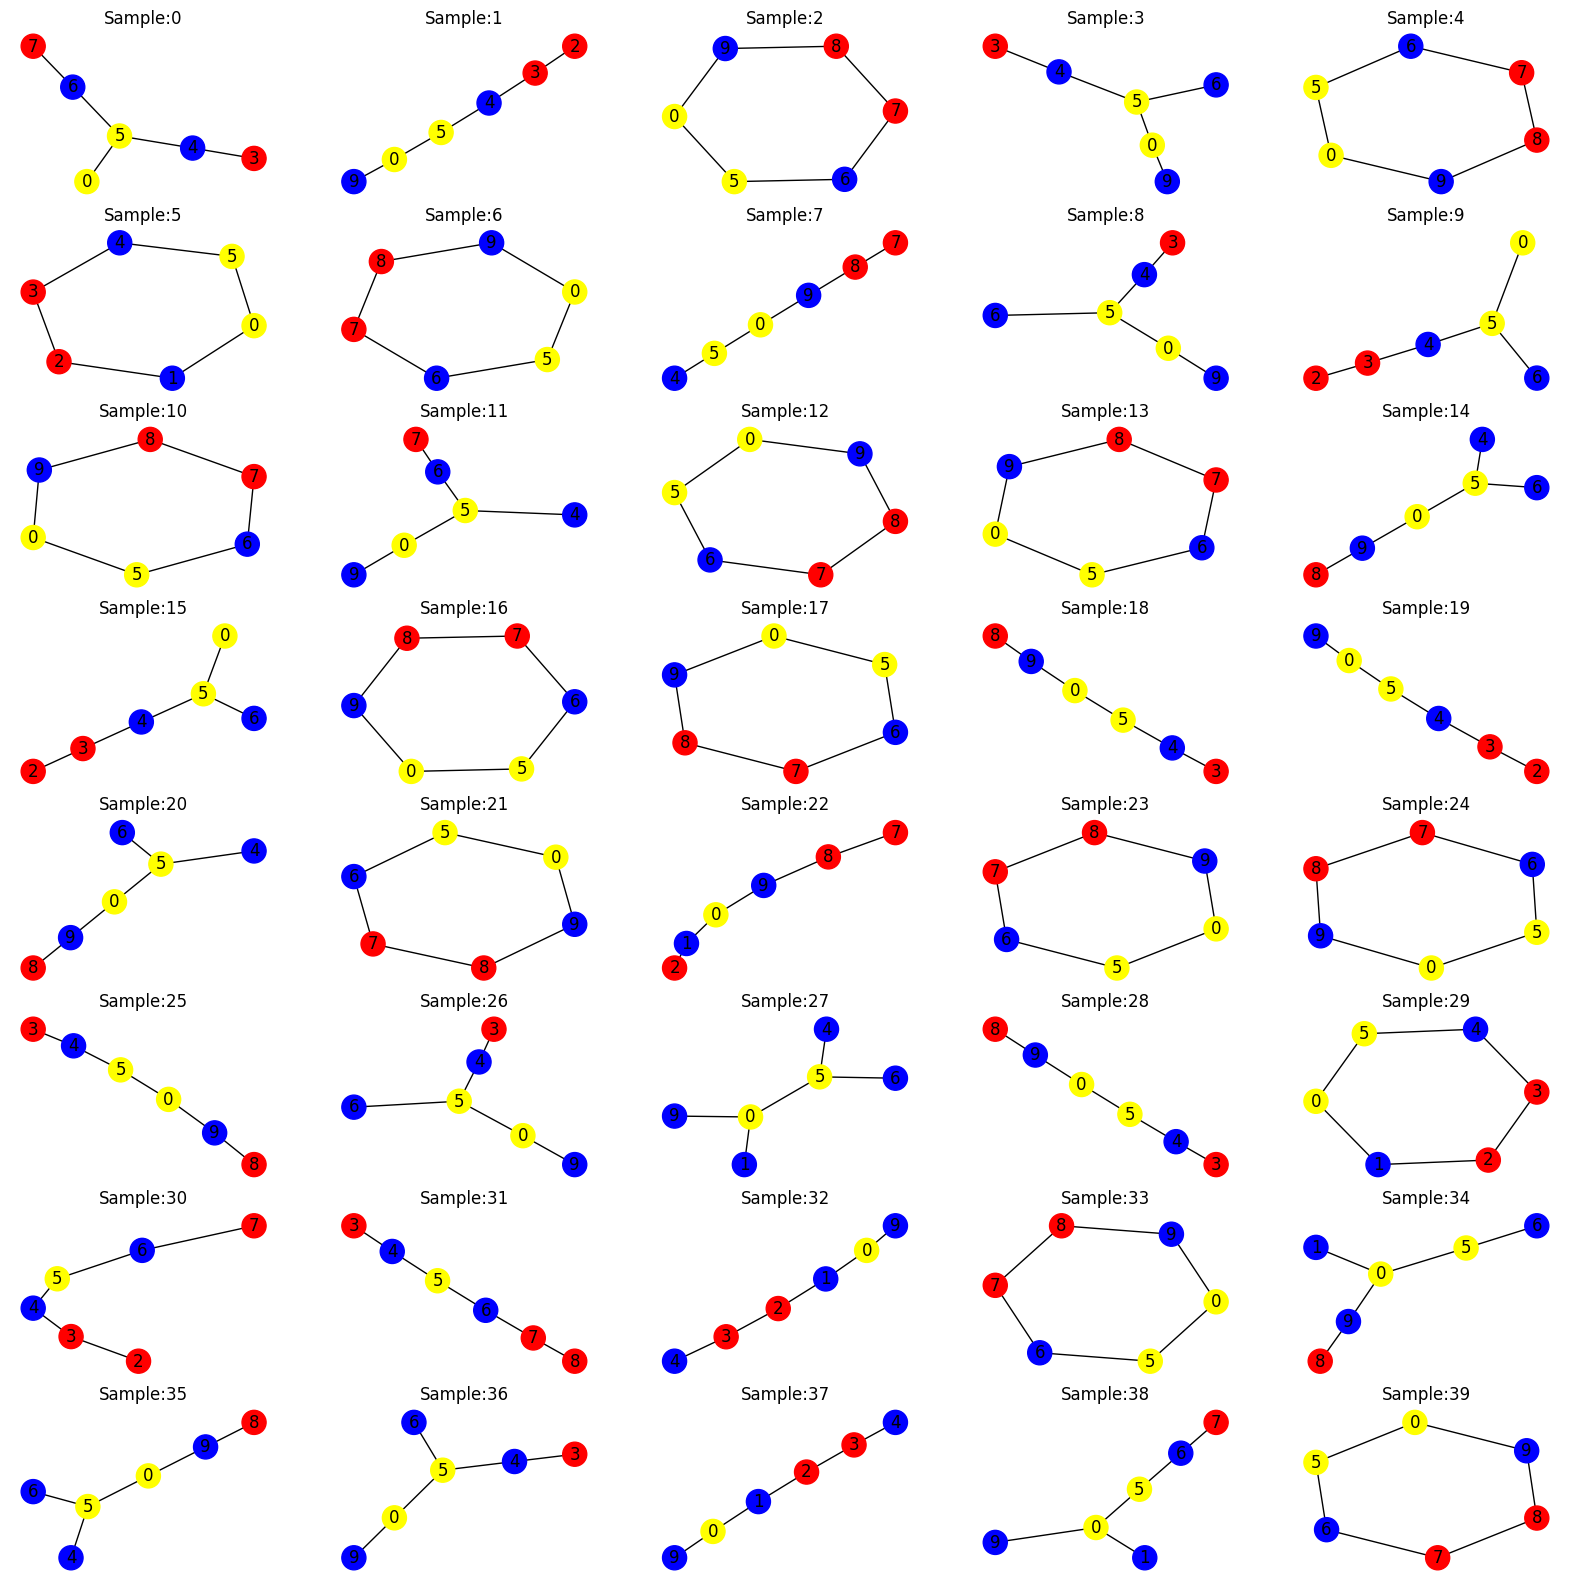

In [19]:
draw_subgraphs(G_edge_index, G_node_color, n, k)

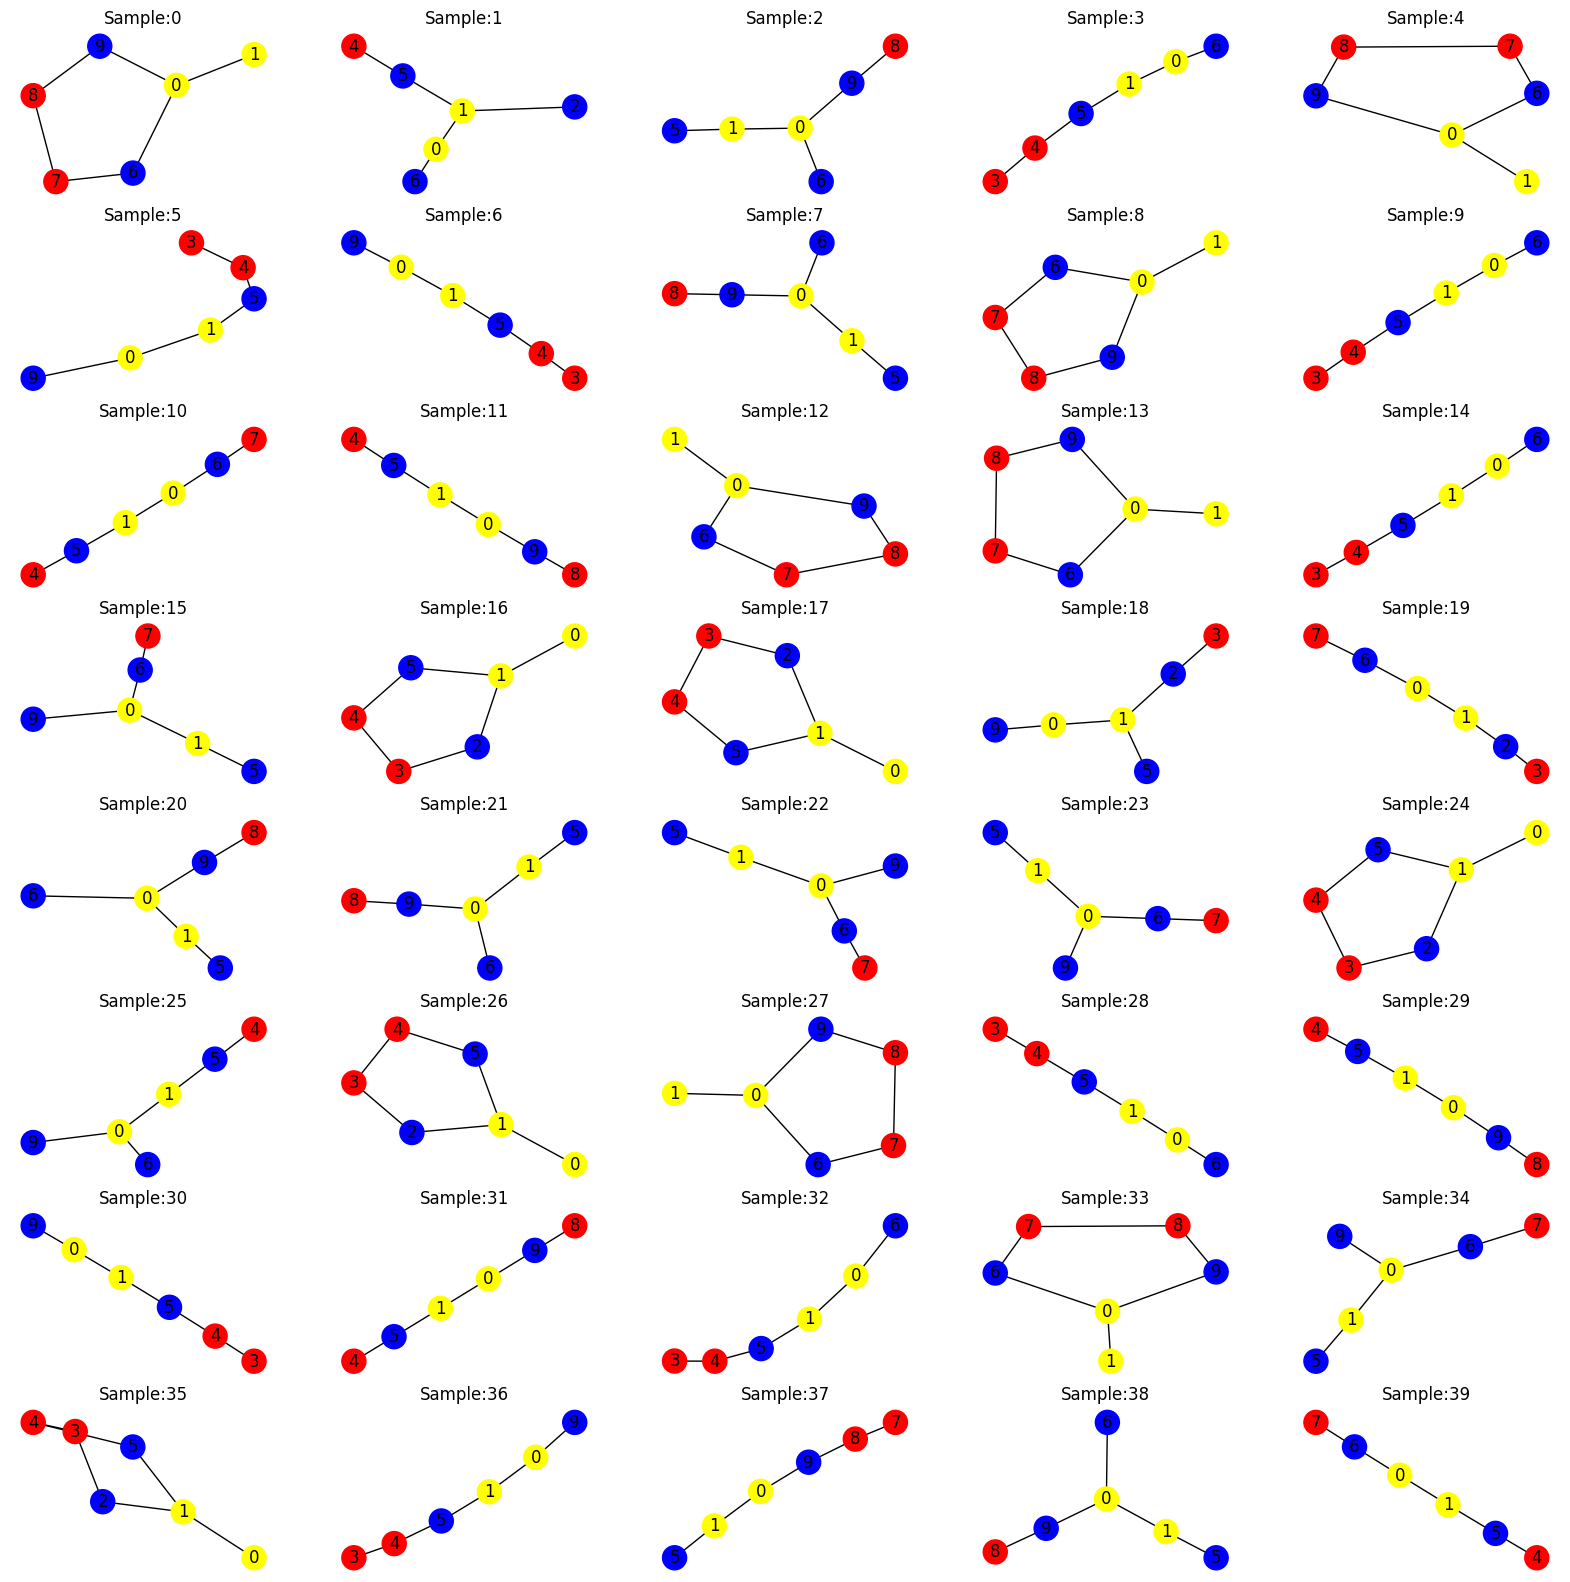

In [9]:
draw_subgraphs(H_edge_index, H_node_color, n, k)